In [1]:
%load_ext autoreload
%cd ..

/Users/tomhanlon58/Desktop/NoisyGAN


In [101]:
%autoreload 2
%reload_ext autoreload
from core import *

INFO:absl:Overwrite dataset info from restored data version.
INFO:absl:Constructing tf.data.Dataset for split train, from gs://tfds-data/datasets/nsynth/gansynth_subset.f0_and_loudness/2.3.0


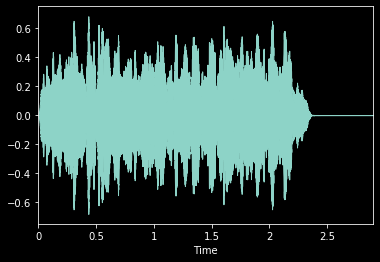

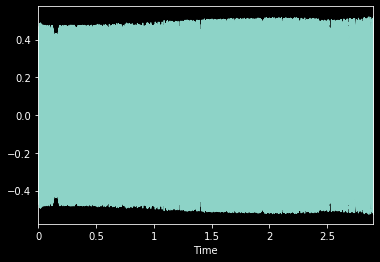

In [52]:
model_name = "gan"
model_dir = "./models/" + model_name + "/"
model_zip = model_dir + model_name + ".zip"

batch_size = 32

gan_model = GAN(batch_size=batch_size,
                latent_dim=8, # now same for f,l,&z
                loss=tf.keras.losses.mean_squared_error,
                # f0
                f0_n_nodes=5,
                f0_n_hidden=2,
                f0_t_scale=0.2,
                f0_z_scale=0.5,
                f0_second_sig=True,
                f0_hidden_activation="tanh",

                #ld
                ld_n_nodes=5,
                ld_n_hidden=2,
                ld_t_scale=0.2,
                ld_z_scale=0.5,
                ld_second_sig=True,
                ld_hidden_activation="tanh",

                #z
                num_z_filters=16,
                )

combined_iter = CombinedIter(gan_model.gen, FromNSynth(split="train", lower_label=True), batch_size=batch_size, overfit=False)
# combined_iter = CombinedIter(gan_model.gen, FromTFRecords('./Data/piano30s.tfrecord*'), batch_size=batch_size, overfit=False)

batch = combined_iter.getNext()
real = batch["audio"][batch_size-1]
fake = batch["audio"][0]
play(real)
play(fake)
wavePlot(real)
wavePlot(fake)

# Interpolate between latent vectors

In [15]:
import numpy as np

latent_1 = np.random.random((1,8)).astype('float32')
latent_2 = np.random.random((1,8))

for i in range(10):
    latent = ((10-i)/10)*latent_1 + (i/10)*latent_2
    generated = gan_model.gen.gen_from_latent(latent)
    play(generated['audio'])

In [102]:
logging.set_verbosity(logging.INFO)
# logging.set_verbosity(logging.DEBUG)
train_gan(gan_model, 
          combined_iter, 
          total_iters=1,
          # gen
          gen_iters=1,
          gen_grad_clip_norm=3.0,
          gen_opt=tf.keras.optimizers.Adam(lr=0.001), 
          # disc
          disc_iters=1,
          disc_grad_clip_norm=3.0,
          disc_opt=tf.keras.optimizers.Adam(lr=0.001),
          # checkpoints
          loss_period=1,
          audio_period=2,
          save_audio=False,
          weights_period=1000,
          auto_load_weights=False,
          model_dir=model_dir, 
          )

INFO:absl:----- GAN Step 3 -----


tf.Tensor(
[[ 0.00168367]
 [ 0.0123733 ]
 [ 0.00466611]
 [-0.00819448]
 [-0.02303259]
 [-0.00167584]
 [-0.02292932]
 [-0.00212014]
 [-0.00866665]
 [-0.01206483]
 [ 0.0069131 ]
 [ 0.01030685]
 [-0.01233824]
 [-0.00679767]
 [ 0.02119756]
 [ 0.00999584]
 [ 0.8991153 ]
 [ 0.89537275]
 [ 0.9067346 ]
 [ 0.9108    ]
 [ 0.9159115 ]
 [ 0.91572696]
 [ 0.92323774]
 [ 0.8998772 ]
 [ 0.88750076]
 [ 0.9094967 ]
 [ 0.8899776 ]
 [ 0.88605183]
 [ 0.9233991 ]
 [ 0.9033842 ]
 [ 0.8823804 ]
 [ 0.8937651 ]], shape=(32, 1), dtype=float32)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/tomhanlon58/.local/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py", line 1302, in convert_to_tensor
    value, dtype=preferred_dtype, name=name, as_ref=as_ref)
  File "/Users/tomhanlon58/.local/lib/python3.6/site-packages/tensorflow_core/python/framework/tensor_conversion_registry.py", line 52, in _default_conversion_function
    return constant_op.constant(value, dtype, name=name)
  File "/Users/tomhanlon58/.local/lib/python3.6/site-packages/tensorflow_core/python/framework/constant_op.py", line 258, in constant
    allow_broadcast=True)
  File "/Users/tomhanlon58/.local/lib/python3.6/site-packages/tensorflow_core/python/framework/constant_op.py", line 261, in _constant_impl
    def _constant_impl(
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/tomhanlon58/anaconda3/envs/ddsp_env/lib/python3.6/site-packages/IPython/core/inter

TypeError: must be str, not list

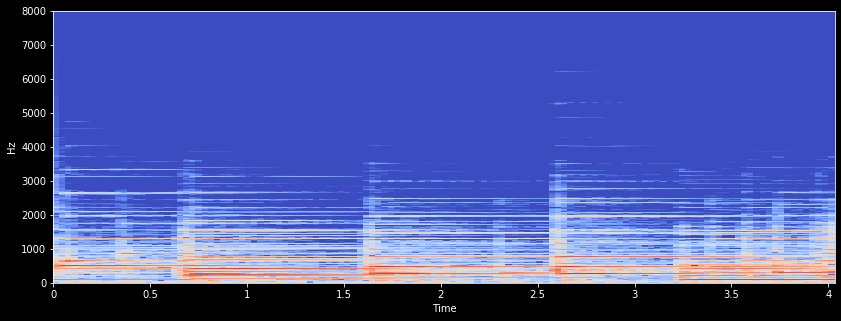

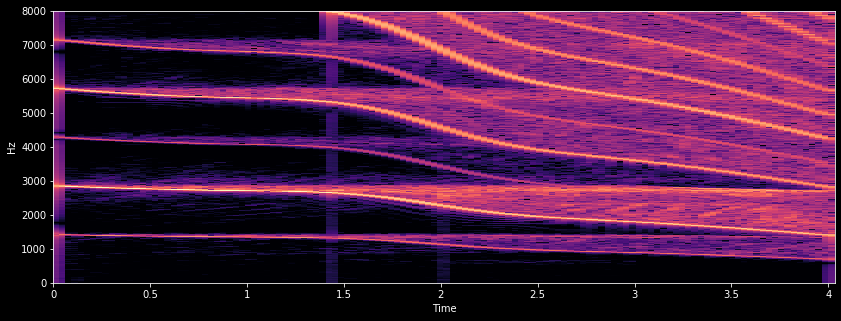

In [6]:
batch = combined_iter.getNext()
real = batch["audio"][batch_size-1]
fake = batch["audio"][0]
play(real)
play(fake)
specPlot(real)
specPlot(fake)

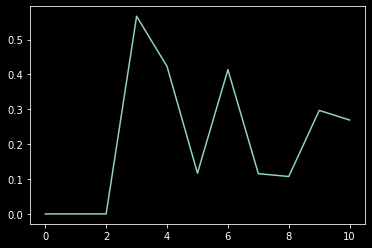

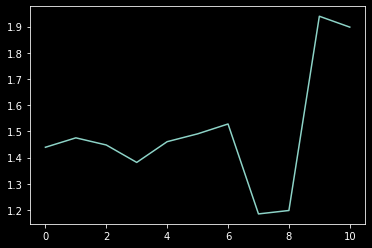

In [31]:
losses_df = pd.read_csv("./models/junk/" + "losses.csv")
plt.plot(losses_df.disc)
plt.show()
plt.plot(losses_df.gen)
plt.show()